In [2]:
#this part parses through all the images in the datasets and separates the faces with masks and without masks

import os
import xml.etree.ElementTree as ET
import cv2
import random


def cropandstore(filename, status, box):
    xmin,xmax,ymin,ymax = box
    os.chdir("Face Mask Detection/images")
    img = cv2.imread(filename)
    crop = img[ymin:ymax, xmin:xmax]
    cv2.imshow("img",crop)

    os.chdir("..")
    os.chdir("..")
    if status == "with_mask" or status == "mask_weared_incorrect":
        os.chdir("face images/with_mask")
        if filename in os.listdir():
            filename = filename[:-4] + str(random.randint(1000,10000)) + ".png"
        cv2.imwrite(filename, crop)
    else:
        os.chdir("face images/without_mask")
        cv2.imwrite(filename, crop)

    os.chdir("..")
    os.chdir("..")

def segregate():
    count = 1
    for file in os.listdir("Face Mask Detection/annotations"):
        with open("Face Mask Detection/annotations/" + file, 'r') as f:
            data = f.read()
        tree = ET.parse("Face Mask Detection/annotations/"+file)
        root = tree.getroot()

        for object in root.findall('object'):
            status = object.find('name')
            if status is not None:
                status = status.text
                filename = root.find('filename').text
                bndbox = object.find('bndbox')
                xmin = int(bndbox.find('xmin').text)
                xmax = int(bndbox.find('xmax').text)
                ymin = int(bndbox.find('ymin').text)
                ymax = int(bndbox.find('ymax').text)
                cropandstore(filename, status, (xmin,xmax,ymin,ymax))

        print(count, "image done")
        count+=1

        
segregate()

1 image done
2 image done
3 image done
4 image done
5 image done
6 image done
7 image done
8 image done
9 image done
10 image done
11 image done
12 image done
13 image done
14 image done
15 image done
16 image done
17 image done
18 image done
19 image done
20 image done
21 image done
22 image done
23 image done
24 image done
25 image done
26 image done
27 image done
28 image done
29 image done
30 image done
31 image done
32 image done
33 image done
34 image done
35 image done
36 image done
37 image done
38 image done
39 image done
40 image done
41 image done
42 image done
43 image done
44 image done
45 image done
46 image done
47 image done
48 image done
49 image done
50 image done
51 image done
52 image done
53 image done
54 image done
55 image done
56 image done
57 image done
58 image done
59 image done
60 image done
61 image done
62 image done
63 image done
64 image done
65 image done
66 image done
67 image done
68 image done
69 image done
70 image done
71 image done
72 image done
7

562 image done
563 image done
564 image done
565 image done
566 image done
567 image done
568 image done
569 image done
570 image done
571 image done
572 image done
573 image done
574 image done
575 image done
576 image done
577 image done
578 image done
579 image done
580 image done
581 image done
582 image done
583 image done
584 image done
585 image done
586 image done
587 image done
588 image done
589 image done
590 image done
591 image done
592 image done
593 image done
594 image done
595 image done
596 image done
597 image done
598 image done
599 image done
600 image done
601 image done
602 image done
603 image done
604 image done
605 image done
606 image done
607 image done
608 image done
609 image done
610 image done
611 image done
612 image done
613 image done
614 image done
615 image done
616 image done
617 image done
618 image done
619 image done
620 image done
621 image done
622 image done
623 image done
624 image done
625 image done
626 image done
627 image done
628 image 

In [1]:
## Importing libraries
import pandas as pd
import numpy as np
import cv2
import os
import glob
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras import Sequential, models
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
path = "TrainTestValidation/"

In [14]:
dataset = {
    "image_path": [],
    "mask_status": [],
    "where": []
}

for where in os.listdir(path):
    for status in os.listdir(path+"/"+where):
        for image in glob.glob(path+where+"/"+status+"/"+"*.png"):
            dataset["image_path"].append(image)
            dataset["mask_status"].append(status)
            dataset["where"].append(where)
            
dataset = pd.DataFrame(dataset)
dataset.head()

,image_path,mask_status,where
0,TrainTestValidation/Test/without_mask\maksssks...,without_mask,Test
1,TrainTestValidation/Test/without_mask\maksssks...,without_mask,Test
2,TrainTestValidation/Test/without_mask\maksssks...,without_mask,Test
3,TrainTestValidation/Test/without_mask\maksssks...,without_mask,Test
4,TrainTestValidation/Test/without_mask\maksssks...,without_mask,Test


With Mask: 3356
Without Mask: 286


<AxesSubplot:xlabel='mask_status', ylabel='count'>

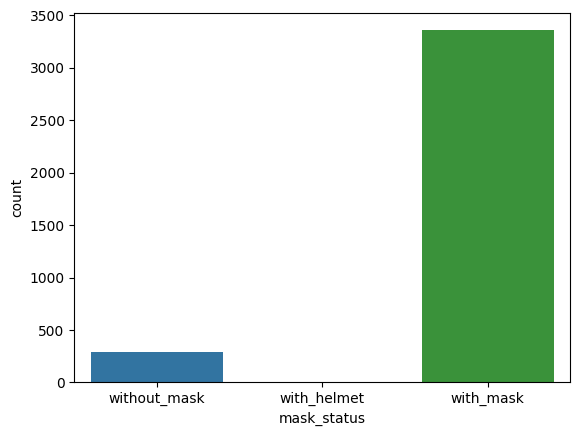

In [15]:
## Checking for total number of images in the dataset
print(f"With Mask:", dataset.value_counts("mask_status")[0])
print(f"Without Mask:", dataset.value_counts("mask_status")[1])

## Plotting the numbers
sns.countplot(x = dataset["mask_status"])


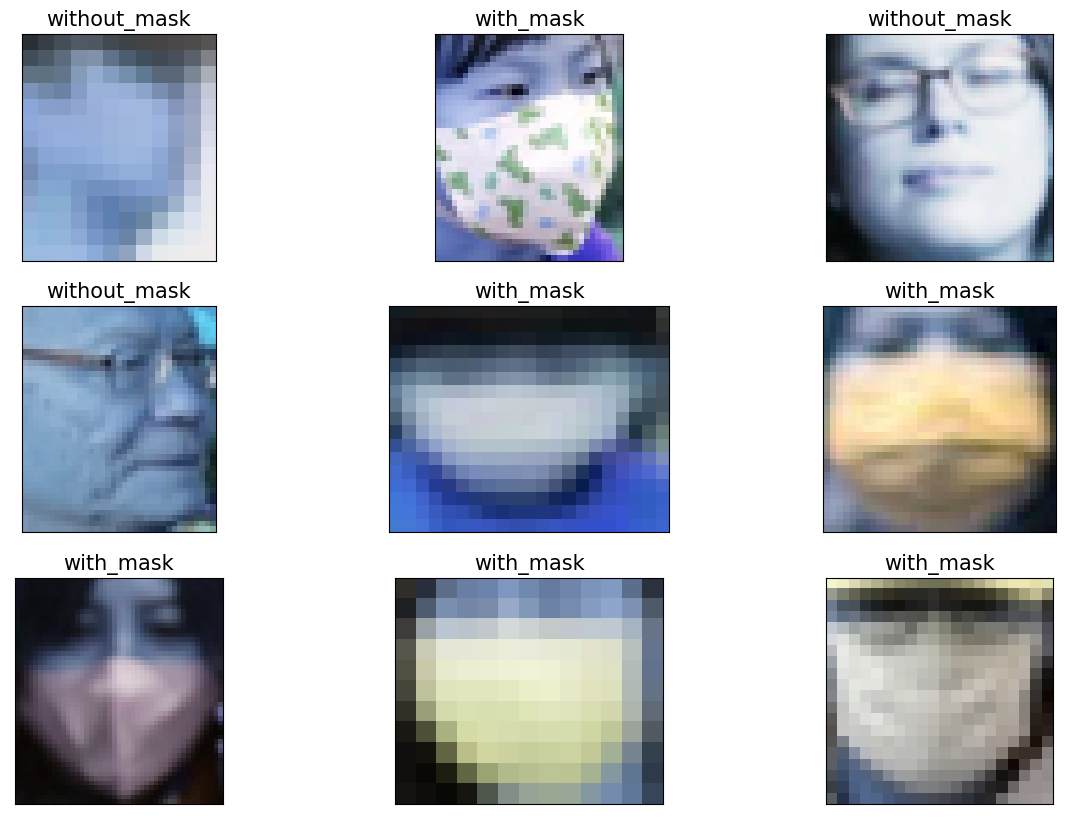

In [16]:
plt.figure(figsize = (15, 10))

for i in range(9):
    random = np.random.randint(1, len(dataset))
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.imread(dataset.loc[random,"image_path"]))
    plt.title(dataset.loc[random,"mask_status"], size = 15)
    plt.xticks([])
    plt.yticks([])
    
plt.show()

In [17]:
## Splitting train test and Validation Dataset
train_df = dataset[dataset["where"] == "Train"]
test_df = dataset[dataset["where"] == "Test"]
valid_df = dataset[dataset["where"] == "Validation"]

print(train_df.head(10))

## Shuffling the dataset 
train_df = train_df.sample(frac = 1)
test_df = test_df.sample(frac = 1)
valid_df = valid_df.sample(frac = 1)

print("\n After Shuffling \n")
print(train_df.head(10))

                                            image_path   mask_status  where
264  TrainTestValidation/Train/without_mask\maksssk...  without_mask  Train
265  TrainTestValidation/Train/without_mask\maksssk...  without_mask  Train
266  TrainTestValidation/Train/without_mask\maksssk...  without_mask  Train
267  TrainTestValidation/Train/without_mask\maksssk...  without_mask  Train
268  TrainTestValidation/Train/without_mask\maksssk...  without_mask  Train
269  TrainTestValidation/Train/without_mask\maksssk...  without_mask  Train
270  TrainTestValidation/Train/without_mask\maksssk...  without_mask  Train
271  TrainTestValidation/Train/without_mask\maksssk...  without_mask  Train
272  TrainTestValidation/Train/without_mask\maksssk...  without_mask  Train
273  TrainTestValidation/Train/without_mask\maksssk...  without_mask  Train

 After Shuffling 

                                             image_path   mask_status  where
1613  TrainTestValidation/Train/with_mask\maksssksks...     with_ma

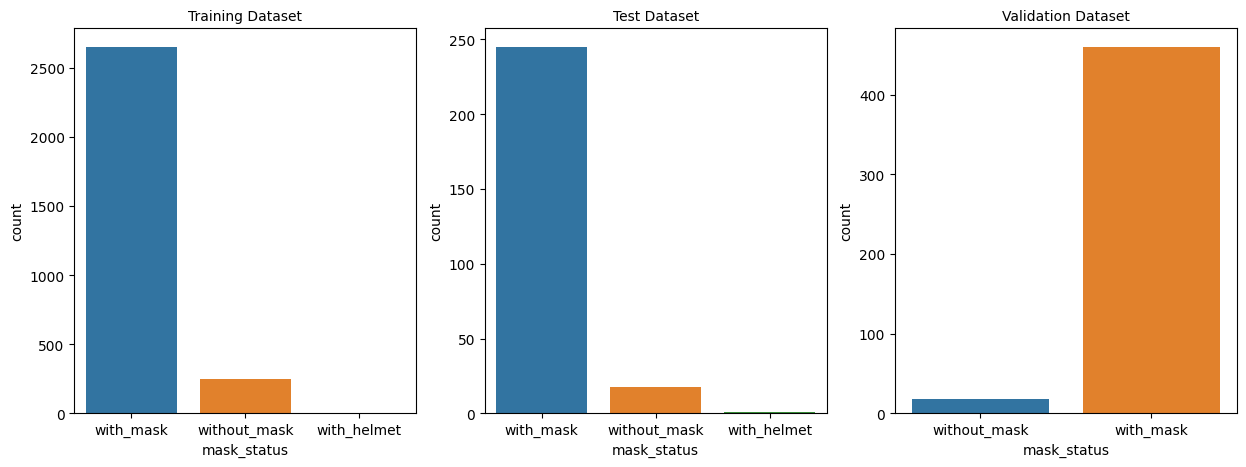

In [19]:
#Visualising the distribution of train test and validation set

plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x = train_df["mask_status"])
plt.title("Training Dataset", size = 10)

plt.subplot(1, 3, 2)
sns.countplot(x = test_df["mask_status"])
plt.title("Test Dataset", size = 10)

plt.subplot(1, 3, 3)
sns.countplot(x = valid_df["mask_status"])
plt.title("Validation Dataset", size = 10)

plt.show()

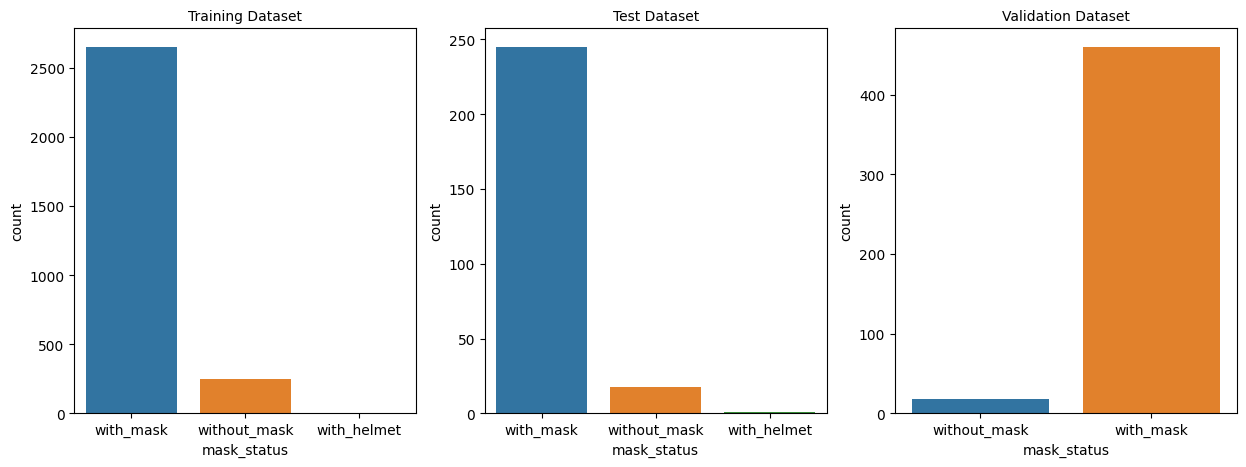

In [20]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
sns.countplot(x = train_df["mask_status"])
plt.title("Training Dataset", size = 10)

plt.subplot(1, 3, 2)
sns.countplot(x = test_df["mask_status"])
plt.title("Test Dataset", size = 10)

plt.subplot(1, 3, 3)
sns.countplot(x = valid_df["mask_status"])
plt.title("Validation Dataset", size = 10)

plt.show()

In [21]:
train_df = train_df.reset_index().drop("index", axis = 1)
train_df.head()

,image_path,mask_status,where
0,TrainTestValidation/Train/with_mask\maksssksks...,with_mask,Train
1,TrainTestValidation/Train/without_mask\maksssk...,without_mask,Train
2,TrainTestValidation/Train/without_mask\maksssk...,without_mask,Train
3,TrainTestValidation/Train/with_mask\maksssksks...,with_mask,Train
4,TrainTestValidation/Train/with_mask\maksssksks...,with_mask,Train


In [22]:
## Reading all the image into a list and changing the size of the image to (150,150)
data = []
image_size = 150

for i in range(len(train_df)):
    ## Converting the image into grayscale
    img_array = cv2.imread(train_df["image_path"][i], cv2.IMREAD_GRAYSCALE)

    ## Resizing the array
    new_image_array = cv2.resize(img_array, (image_size, image_size))

    ##Encoding the image with the label
    if train_df["mask_status"][i] == "WithMask":
        data.append([new_image_array, 1])
    else:
        data.append([new_image_array, 0])

In [23]:
data = np.array(data)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_17932\4012140830.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array(data)


In [24]:
data[0][0].shape

(150, 150)

In [26]:
## Shuffling the data to make sure everything is not in order
np.random.shuffle(data)

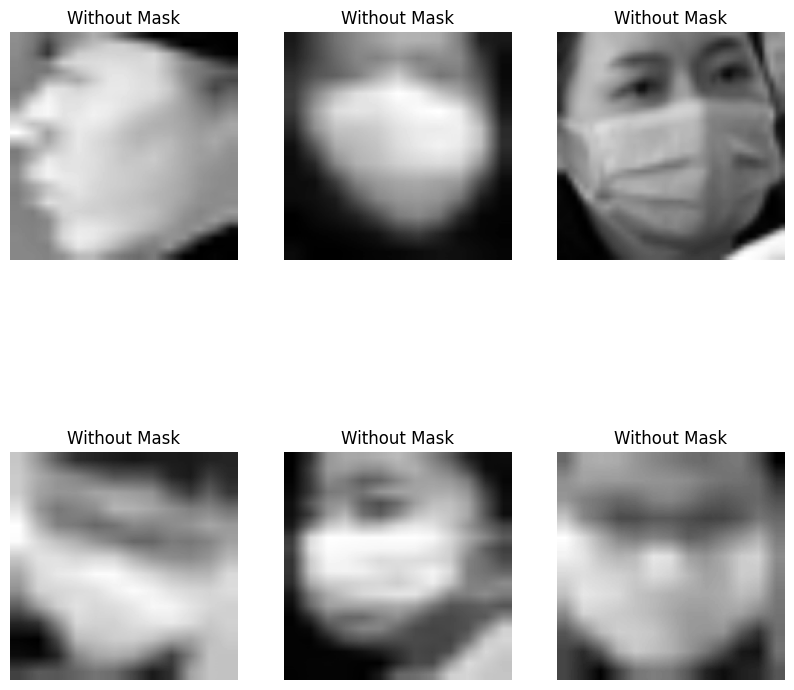

In [27]:
## Looking at the training samples

fig, ax = plt.subplots(2, 3, figsize=(10, 10))

for row in range(2):
    for col in range(3):
        image_index = row*100+col
        
        ax[row, col].axis("off")
        ax[row,col].imshow(data[image_index][0], cmap = "gray")
    
        if data[image_index][1] == 0:
            ax[row, col].set_title("Without Mask")
        else:
            ax[row, col].set_title("With Mask")
            
plt.show()

In [29]:
#Preparing data to be loaded into the Model
X = []
y = []

## Seperating X and y
for image in data:
    X.append(image[0])
    y.append(image[1])
    
## Converting X and y to numpy array as Tensorflow accepts only numpy arrays
X = np.array(X)
y = np.array(y)

In [30]:
### Normalizing the data
X = X/255

### Train Test Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [32]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(Conv2D(64, (3, 3), activation = "relu"))
model.add(MaxPool2D(pool_size=(3, 3)))
model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))
#model.summary()

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [46]:
print(len(X_val), X_val.shape[1], X_val.shape[2])
print(type(X_val))

581 150 150
<class 'numpy.ndarray'>


In [34]:
# X_train = X_train.reshape(-1, 32, 150, 150)
## Reshaping training set to match Conc2D
X_train = X_train.reshape(len(X_train), X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(len(X_val), X_val.shape[1], X_val.shape[2], 1)

history = model.fit(X_train, y_train, epochs=5, batch_size = 32)

Epoch 1/5
73/73 [==============================] - 84s 1s/step - loss: 0.0100 - accuracy: 0.9866
Epoch 2/5
73/73 [==============================] - 83s 1s/step - loss: 6.5290e-17 - accuracy: 1.0000
Epoch 3/5
73/73 [==============================] - 83s 1s/step - loss: 6.4373e-17 - accuracy: 1.0000
Epoch 4/5
73/73 [==============================] - 82s 1s/step - loss: 6.4373e-17 - accuracy: 1.0000
Epoch 5/5
73/73 [==============================] - 83s 1s/step - loss: 6.4373e-17 - accuracy: 1.0000


In [37]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 64)      640       
                                                                 
 conv2d_3 (Conv2D)           (None, 146, 146, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 147456)            0         
                                                                 
 dense_2 (Dense)             (None, 128)               18874496  
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                      

In [35]:
model.evaluate(X_val, y_val)

19/19 [==============================] - 3s 152ms/step - loss: 5.3061e-13 - accuracy: 1.0000


[5.306134221241821e-13, 1.0]

In [39]:
prediction = model.predict(X_val)

19/19 [==============================] - 3s 161ms/step


In [41]:
model.save("mainModelNew.h5")

In [43]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('tfliteModelNew.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\Lenovo\AppData\Local\Temp\tmpe080qr0y\assets


INFO:tensorflow:Assets written to: C:\Users\Lenovo\AppData\Local\Temp\tmpe080qr0y\assets
